# PRE-PROCESSING

- Detecting and Cleaning Missing Value
- Detecting Outlier
- Transformation or Recoding Categorical Value
- Feature Selection
- Feature Extraction (PCA)

## The Characteristics of Data

In [4]:
import pandas as pd

In [5]:
bms=pd.read_csv("bms.csv",sep=';',index_col=0)

In [6]:
bms.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [7]:
bms.shape

(8523, 11)

In [8]:
bms.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
bms["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
bms["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
bms["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [12]:
bms["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [13]:
bms["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
bms["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [15]:
bms["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

> There is an inconsistent data in Item_Fat_Content Variable, so we need to replace "LF" and "low fat" to "Low Fat, "reg" to "Regular".

In [16]:
bms["Item_Fat_Content"]=bms["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat")
bms["Item_Fat_Content"]=bms["Item_Fat_Content"].replace("reg","Regular")

In [17]:
bms["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
bms.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [19]:
import matplotlib.pyplot as plt
# %matplotlib inline

plt.style.use("seaborn")
import seaborn as sns

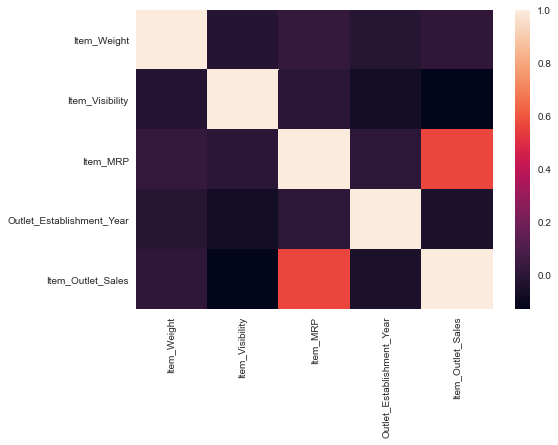

In [20]:
corr=bms.corr()
sns.heatmap(corr)

## Detecting Missing Values 

In [21]:
import numpy as np

In [22]:
bms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [23]:
np.sum(bms.isnull())

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> We know that there is some missing values in Item_Weight and Outlet_Size Variable, the persentation of missing values in Item_Weight Variable is 17.16% and 28.28% in Outlet_Sales Variable. Based on the correlation matrix above, we don't need to drop this missing values or variables but we need to cleaning this missing values by imputing with mean, median, or mode.

## Cleaning Missing Values

> Cleaning missing values in Item_Weight Variable by mean imputation because the type of data is numeric. Cleaning missing values in categorical variable such as Outlet_Size by imputing with mode.

In [24]:
from sklearn.impute import SimpleImputer
from scipy.stats import mode

In [25]:
bms["Item_Weight"].mean()

12.857645184136183

In [26]:
bms["Outlet_Size"].mode()

0    Medium
dtype: object

In [27]:
bms["Item_Weight"]=bms["Item_Weight"].fillna(bms["Item_Weight"].mean())
bms["Outlet_Size"]=bms["Outlet_Size"].fillna(bms["Outlet_Size"].mode()[0])

In [28]:
bms.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Detecting Outlier

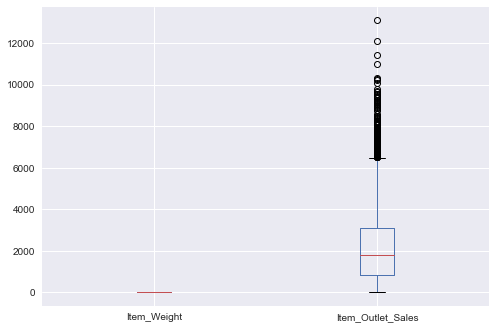

In [23]:
bms.boxplot(["Item_Weight","Item_Outlet_Sales"])

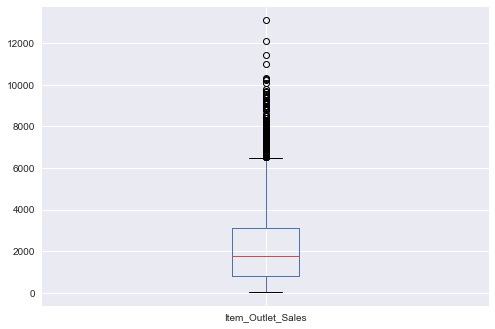

In [25]:
bms.boxplot(column="Item_Outlet_Sales")

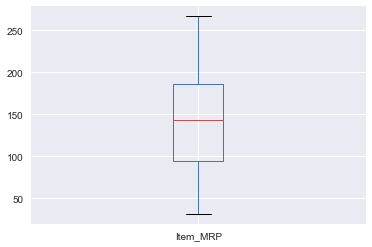

In [29]:
bms.boxplot(column="Item_MRP")

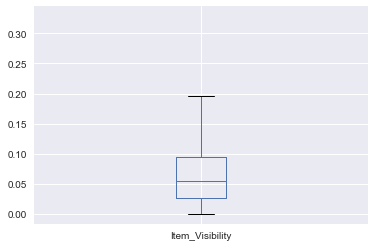

In [30]:
bms.boxplot(column="Item_Visibility")

> There is no outlier in Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales Variables.

In [29]:
from scipy import stats
z=np.abs(stats.zscore(bms._get_numeric_data()))
print(z)

[[0.84187169 0.97073217 1.74745381 0.13954076 0.910601  ]
 [1.64170589 0.90811123 1.48902325 1.33410274 1.01844035]
 [1.09855449 0.95691733 0.01004021 0.13954076 0.04923754]
 ...
 [0.53424315 0.59978449 0.89720755 0.73682175 0.57909963]
 [1.33644372 1.53287976 0.60797692 1.33410274 0.19672492]
 [0.45963367 0.41193591 1.05226104 0.09937163 0.82959407]]


In [30]:
outlier=bms[(z<3).all(axis=1)]
print(outlier.shape)

(8338, 11)


In [31]:
import seaborn as sns
sns.set(style="whitegrid")

In [32]:
c=pd.DataFrame([])
c["Keterangan:"]=["tidak ada outlier","outlier"]
c["jumlah observasi"]=[8338,8523-8338]
c

,Keterangan:,jumlah observasi
0,tidak ada outlier,8338
1,outlier,185


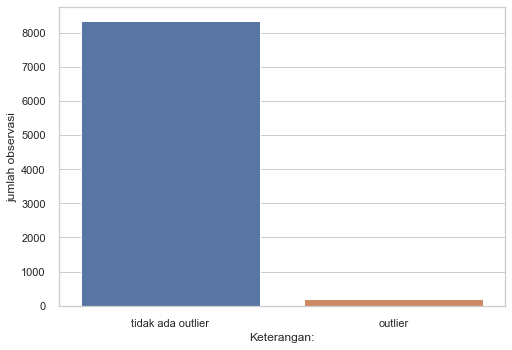

In [33]:
plot=sns.barplot(x="Keterangan:",y="jumlah observasi",data=c)

> There are 185 multivariate outliers

## Data Visualization

In [29]:
sns.set(style="whitegrid")

C:\Users\Fitria Nur Aida\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


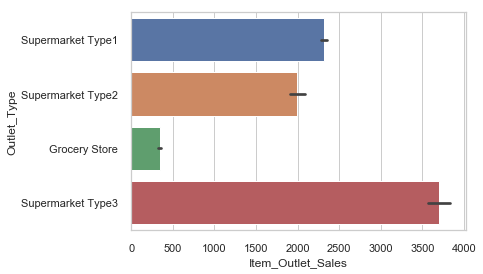

In [39]:
sns.barplot(x="Item_Outlet_Sales",y="Outlet_Type",data=bms)

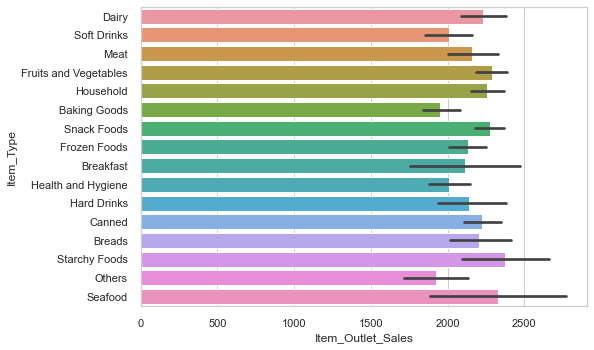

In [30]:
sns.barplot(x="Item_Outlet_Sales",y="Item_Type",data=bms)

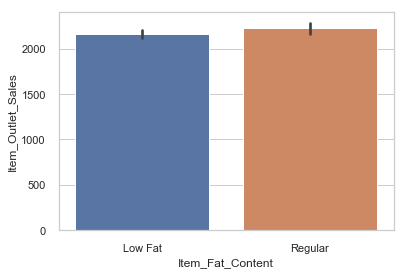

In [41]:
sns.barplot(y="Item_Outlet_Sales",x="Item_Fat_Content",data=bms)

## Transformation or Recoding Categorical Value

In [34]:
bms.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
kategori=["Item_Fat_Content", "Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for feature in kategori:
    if feature in bms.columns.values:
        bms[feature]=le.fit_transform(bms[feature])

In [36]:
bms.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
DRC01,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
FDN15,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
FDX07,19.20,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
NCD19,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [37]:
bms.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

## Principal Component Analysis 

### Feature Selection

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [55]:
bmsx=np.array([bms["Item_Weight"],bms["Item_Fat_Content"],bms["Item_Visibility"],bms['Item_MRP'],bms["Outlet_Size"]])
bmsx.shape

(5, 8523)

In [56]:
import numpy as np
bmsx

array([[9.30000000e+00, 5.92000000e+00, 1.75000000e+01, ...,
        1.06000000e+01, 7.21000000e+00, 1.48000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.60473010e-02, 1.92782160e-02, 1.67600750e-02, ...,
        3.51862710e-02, 1.45220646e-01, 4.48782800e-02],
       [2.49809200e+02, 4.82692000e+01, 1.41618000e+02, ...,
        8.51224000e+01, 1.03133200e+02, 7.54670000e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00]])

In [57]:
bmsxt=bmsx.transpose()
bmsxt.shape

(8523, 5)

In [58]:
bms_std=StandardScaler().fit_transform(bmsxt)
bms_std

array([[-0.84187169, -0.73814723, -0.97073217,  1.74745381, -0.28458121],
       [-1.64170589,  1.35474328, -0.90811123, -1.48902325, -0.28458121],
       [ 1.09855449, -0.73814723, -0.95691733,  0.01004021, -0.28458121],
       ...,
       [-0.53424315, -0.73814723, -0.59978449, -0.89720755,  1.38127431],
       [-1.33644372,  1.35474328,  1.53287976, -0.60797692, -0.28458121],
       [ 0.45963367, -0.73814723, -0.41193591, -1.05226104,  1.38127431]])

In [68]:
pcafs=PCA(n_components=0.70,whiten=True)
bmsfs_pca=pcafs.fit_transform(bms_std)

In [69]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfs_pca.shape[1])

Original number of features: 5
Reduced numer of features: 4


In [70]:
datafs_pca=pd.DataFrame(bmsfs_pca, columns=["PC1","PC2","PC3","PC4"])
datafs_pca

,PC1,PC2,PC3,PC4
0,-0.905339,0.532946,0.467277,-2.012024
1,0.189393,-2.464418,0.546322,-0.041835
2,-1.323776,0.658592,-0.378170,0.422434
3,-0.800139,0.934151,1.459296,0.865834
4,-1.932469,-2.094947,-0.119546,0.026075
...,...,...,...,...
8518,-1.126692,-0.601088,1.016007,-1.632324
8519,0.397127,-1.397350,0.942667,-0.083106
8520,0.171736,-0.471014,-1.595302,-0.433513
8521,1.708602,-1.411307,0.819933,0.160984


> After performing principal component analysis using the feature selection method, it was found that from the beginning there were 10 predictor variables then reduced to 9 predictor variables.

### Feature Extraction

In [71]:
from sklearn import decomposition

In [75]:
pcafe=decomposition.PCA(n_components=3)
bmsfe_pca=pcafe.fit_transform(bms_std)

In [76]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfe_pca.shape[1])

Original number of features: 5
Reduced numer of features: 3


In [78]:
datafe_pca=pd.DataFrame(bmsfe_pca, columns=["PC1","PC2", "PC3"])
datafe_pca

,PC1,PC2,PC3
0,-0.944736,0.539700,0.467727
1,0.197634,-2.495648,0.546847
2,-1.381382,0.666938,-0.378534
3,-0.834957,0.945989,1.460699
4,-2.016563,-2.121495,-0.119661
...,...,...,...
8518,-1.175721,-0.608705,1.016983
8519,0.414409,-1.415057,0.943573
8520,0.179209,-0.476983,-1.596835
8521,1.782954,-1.429192,0.820721


> After performing principal component analysis using the feature extraction method, it was found that from the beginning there were 10 predictor variables then reduced to 2 predictor variables.